<a href="https://colab.research.google.com/github/LelouchFT/Prediction_Stock/blob/main/prediction_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# bibliotheque
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
df = pd.read_csv("dataset_clean.csv")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_clean.csv'

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['Mois'] = df['date'].dt.month
df['Annee'] = df['date'].dt.year

In [ ]:
df_group = df.groupby(['Mois','Annee','Ville','ProductName']).agg({'Quantity':'sum','Unit':'first','Categorie':'first','manufacturer':'first','Region':'first'})

In [25]:

def preprocessing():
    # Colonnes
    cat_features = ['ProductName', 'Categorie', 'manufacturer', 'Ville']
    num_features = ['Unit', 'Mois', 'Annee']

    # Prétraitement
    num_transformer = Pipeline([
        ('scaler', MinMaxScaler())
    ])

    cat_transformer = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

    # Pipeline complet
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state = 42))
    ])

    return pipeline

In [ ]:
df_bt = df[df['Ville'] == 'Bertoua'].sample(n= 3000,random_state = 42)

In [ ]:
df_dla = df[df['Ville'] == 'Douala'].sample(n= 3000,random_state = 42)

In [ ]:
df_yde = df[df['Ville'] == 'Yaounde'].sample(n= 3000,random_state = 42)
df_yde.head()

,date,Unit,Quantity,Returned,Revenu,Region,Ville,ProductName,Categorie,Price,manufacturer
3016161,2022-09-25,5478.82,4,0,21915.28,Centre,Yaounde,Pilot G2 Pen 33,Fournitures,4999,Nestlé
2989801,2019-12-25,3436.36,4,0,13745.44,Centre,Yaounde,Post-it Notes 32,Fournitures,2755,Samsung
2974179,2022-12-30,4027.93,3,0,12083.79,Centre,Yaounde,Nutella Jar 16,Nourriture,3944,Adidas
2857688,2023-03-23,1566.06,9,0,14094.54,Centre,Yaounde,Kinder Surprise 37,Nourriture,1471,Danone
2842681,2020-02-27,10256.41,12,0,123076.92,Centre,Yaounde,Hot Wheels Set 16,Jouets,9734,Samsung


In [ ]:
df_ds = df[df['Ville'] == 'Dschang'].sample(n= 3000,random_state = 42)

In [ ]:
df_bf = df[df['Ville'] == 'Bafoussam'].sample(n= 3000,random_state = 42)

In [ ]:
df_lb = df[df['Ville'] == 'Limbe'].sample(n= 3000,random_state = 42)

In [ ]:
df = pd.concat([df_dla,df_lb,df_yde,df_bf,df_ds,df_bt])
df.to_csv('dataset_reduit.csv',index = False)

In [ ]:
df = pd.read_csv("/content/dataset_reduit.csv")

df.head()

,date,Unit,Quantity,Returned,Revenu,Region,Ville,ProductName,Categorie,Price,manufacturer,Mois,Annee,Jour
0,2022-08-06,4963.75,15,0,74456.25,Littoral,Douala,Scotch Tape 29,Fournitures,4223,Nike,8,2022,6
1,2022-12-18,32022.58,18,0,576406.44,Littoral,Douala,Converse All Star 16,Chaussures,27955,Johnson & Johnson,12,2022,18
2,2021-05-02,8834.06,13,0,114842.78,Littoral,Douala,Barbie Fashion Set 9,Jouets,7311,Nestlé,5,2021,2
3,2021-09-10,21290.94,16,0,340655.04,Littoral,Douala,H&M Dress 5,Vêtements,20202,Sony,9,2021,10
4,2023-04-20,51623.93,17,0,877606.81,Littoral,Douala,Zara Coat 37,Vêtements,40195,Nestlé,4,2023,20


In [ ]:
df['Ville'].value_counts()

,count
Ville,
Douala,3000
Limbe,3000
Yaounde,3000
Bafoussam,3000
Dschang,3000
Bertoua,3000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mois,17000.0,6.419588,3.426229,1.0,4.0000,6.0,9.0000,12.00
Annee,17000.0,2021.281824,1.503820,2019.0,2020.0000,2021.0,2023.0000,2024.00
Quantity,17000.0,360.006000,129.632260,1.0,294.0000,363.0,437.0000,860.00
Unit,17000.0,136284.554381,270306.802661,630.1,4371.1625,13360.9,68415.8575,1252525.91


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          18000 non-null  object 
 1   Unit          18000 non-null  float64
 2   Quantity      18000 non-null  int64  
 3   Returned      18000 non-null  int64  
 4   Revenu        18000 non-null  float64
 5   Region        18000 non-null  object 
 6   Ville         18000 non-null  object 
 7   ProductName   18000 non-null  object 
 8   Categorie     18000 non-null  object 
 9   Price         18000 non-null  int64  
 10  manufacturer  18000 non-null  object 
 11  Mois          18000 non-null  int64  
 12  Annee         18000 non-null  int64  
 13  Jour          18000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.9+ MB


<Axes: >

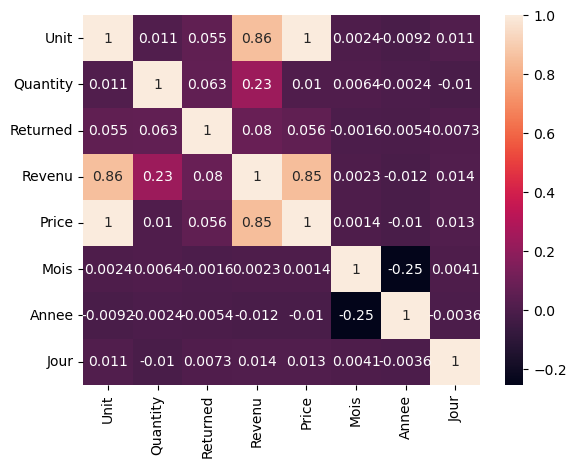

In [ ]:
sns.heatmap(df_group.corr(numeric_only = True),annot = True)

In [ ]:
def preprocessing(df):
    print('preprocessing')
    cat_features = ['ProductName','Categorie','manufacturer','Ville']
    num_features = ['Unit']
    num_tranformer = Pipeline([('scaler',MinMaxScaler())])
    cat_transformer = Pipeline([('encoder',OneHotEncoder(handle_unknown = 'ignore',sparse_output=False))])
    preprocessor = ColumnTransformer([
        ('num',num_tranformer,num_features),
        ('cat',cat_transformer,cat_features)
    ])
    df_clean = preprocessor.fit_transform(df)
    if hasattr(df_clean,'toarray'):
       df_clean = df_clean.toarray()
    new_columns = (
        num_features +
        list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
    )
    df_clean = pd.DataFrame(df_clean,columns=new_columns)
    df_clean['Mois'] = df.Mois
    df_clean['Annee'] = df.Annee
    return df_clean

In [ ]:
param_random = {    "n_estimators":[100,400,300],
                    "max_depth" :[30,20,10,None],
                    "min_samples_split" :[10,5,2],
                    "max_features" : ["sqrt" ,"log2",None,0.5],
               }
param_svc = { "C" :[0.1,1,10,100] ,
              "kernel": ["linear","poly","sigmoid","rbf"] ,
              "gamma" : ["scale","auto" , 0.01, 0.05]
                        }
param_reg = {  "fit_intercept" : [True,False]}


param_tree = {
              "regressor__max_depth" :[20,30,50,40],#[None,5,10,20],
              "regressor__min_samples_split" :[20,10,5],
              "regressor__max_features" : ["log2" ,"sqrt",3],
              "regressor__min_samples_leaf" :[7,10,15,5]
            }

In [ ]:
def train_model_CV(model,param,xtrain,ytrain,xtest,ytest):
       print("", model)

       cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


       grid = GridSearchCV(model,param,cv=cv.split(X_train,X_train['Ville']),scoring='neg_mean_absolute_error',n_jobs = -1)
       grid.fit(xtrain,ytrain)
       # Meilleurs paramètres
       print("Meilleurs paramètres :", grid.best_params_)

       # Meilleur modèle
       best_model = grid.best_estimator_
       print("Score sur les données de validation :", best_model.score(X_test, y_test))
       ypred = best_model.predict(xtest)

       square_error = mean_squared_error(ytest,ypred)
       abs_error = mean_absolute_error( ytest,ypred)
       score_r2 = r2_score( ytest,ypred)
       return best_model,ypred, square_error,abs_error,score_r2

In [ ]:
def train_model_Random(model,param,xtrain,ytrain,xtest,ytest):
       print("", model)
       grid = RandomizedSearchCV(model,param,cv=4,n_iter=30,n_jobs=-1,scoring='neg_mean_absolute_error',random_state=42)

       grid.fit(xtrain,ytrain)
       # Meilleurs paramètres
       print("Meilleurs paramètres :", grid.best_params_)

       # Meilleur modèle
       best_model = grid.best_estimator_
       print("Score sur les données de validation :", best_model.score(X_test, y_test))
       ypred = best_model.predict(xtest)

       square_error = mean_squared_error(ytest,ypred)
       abs_error = mean_absolute_error( ytest,ypred)
       score_r2 = r2_score( ytest,ypred)
       return best_model,ypred, square_error,abs_error,score_r2

In [ ]:
pipeline = preprocessing()
X_train,X_test,y_train,y_test = train_test_split(df, df.Quantity, stratify = df.Ville,test_size = 0.2, random_state = 42)
df.head()

,date,Unit,Quantity,Returned,Revenu,Region,Ville,ProductName,Categorie,Price,manufacturer,Mois,Annee,Jour
0,2022-08-06,4963.75,15,0,74456.25,Littoral,Douala,Scotch Tape 29,Fournitures,4223,Nike,8,2022,6
1,2022-12-18,32022.58,18,0,576406.44,Littoral,Douala,Converse All Star 16,Chaussures,27955,Johnson & Johnson,12,2022,18
2,2021-05-02,8834.06,13,0,114842.78,Littoral,Douala,Barbie Fashion Set 9,Jouets,7311,Nestlé,5,2021,2
3,2021-09-10,21290.94,16,0,340655.04,Littoral,Douala,H&M Dress 5,Vêtements,20202,Sony,9,2021,10
4,2023-04-20,51623.93,17,0,877606.81,Littoral,Douala,Zara Coat 37,Vêtements,40195,Nestlé,4,2023,20


In [ ]:
svm_model = (SVR(), param_svc)
forest_model = (RandomForestRegressor(random_state=42),param_random)
tree_model = ( pipeline , param_tree )
reg_model = ( LinearRegression() , param_reg)

models =[ tree_model,forest_model , reg_model,svm_model]

In [ ]:

svm_model = SVR()
forest_model = RandomForestRegressor(random_state=42)
tree_model =  DecisionTreeRegressor(random_state=42)
reg_model = LinearRegression()
models2 =[ forest_model, tree_model, reg_model,svm_model]

In [ ]:
def train_model(model,xtrain,ytrain,xtest,ytest):
       print("", model)
       model.fit(xtrain,ytrain)
       ypred = model.predict(xtest)
       square_error = mean_squared_error(ytest,ypred)
       abs_error = mean_absolute_error( ytest,ypred)
       score_r2 = r2_score( ytest,ypred)
       return model,ypred, square_error,abs_error,score_r2

In [ ]:

Models = []
for model in [tree_model]:
       mod,para  = model
       best_model,ypred, square_error,abs_error,score_r2 = train_model_CV(mod, para,X_train,y_train,X_test,y_test)
       print('erreur absolue au test',abs_error)

       Models.append(best_model)

 Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Unit', 'Mois', 'Annee']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ProductName', 'Categorie',
                                                   'manufacturer',
                                                   'Ville'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])
Meilleurs paramètres : {'regressor__m

In [ ]:
from joblib import dump

# Exemple : model est ton modèle entraîné (ex: RandomForestRegressor)
dump(best_model, 'mon_modele.joblib')

['mon_modele.joblib']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from joblib import dump

# Chemin complet vers un dossier dans Drive
chemin = '/content/drive/MyDrive/mon_modele.joblib'
dump(best_model, chemin)

['/content/drive/MyDrive/mon_modele.joblib']

In [ ]:

# Prédiction
y_pred = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Évaluation

mae = mean_absolute_error(y_train, y_pred)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_train, y_pred)

# Affichage des résultats

print("Erreur absolue moyenne (MAE) à l'entraînement :", mae)
print("Erreur absolue moyenne (MAE) au test :", mae_test)

Erreur absolue moyenne (MAE) à l'entraînement : 4.746733725875822
Erreur absolue moyenne (MAE) au test : 4.781165882190067


In [ ]:

Models = []
for model in models2:
       mod  = model
       best_model,ypred, square_error,abs_error,score_r2 = train_model(mod,X_train,y_train,X_test,y_test)
       print('erreur quadratique au test',square_error)
       print('erreur absolue au test',abs_error)
       print('score R2 au test',score_r2)
       Models.append(best_model)

 RandomForestRegressor(random_state=42)
erreur quadratique au test 32.82817272222223
erreur absolue au test 4.922055555555555
score R2 au test -0.08269639737749324
 DecisionTreeRegressor(random_state=42)
erreur quadratique au test 60.48916666666667
erreur absolue au test 6.310277777777777
score R2 au test -0.9949755773654119
 LinearRegression()
erreur quadratique au test 31.01991481264464
erreur absolue au test 4.842503899565018
score R2 au test -0.023058770245607985
 SVR()
erreur quadratique au test 30.322365686330443
erreur absolue au test 4.792041197416799
score R2 au test -5.310579865080989e-05


In [ ]:
for model in models2 :
       mod  = model
       best_model,ypred, square_error,abs_error,score_r2 = train_model(mod, X_train,y_train,X_train,y_train)
       print('erreur quadratique a l\'entrainement ',square_error)
       print('erreur absolue a l\'entrainement ',abs_error)
       print('score R2 a l\'entrainement ',score_r2)

 RandomForestRegressor(random_state=42)
erreur quadratique a l'entrainement  4.504626597222222
erreur absolue a l'entrainement  1.7989722222222222
score R2 a l'entrainement  0.8503836629220309
 DecisionTreeRegressor(random_state=42)
erreur quadratique a l'entrainement  0.0
erreur absolue a l'entrainement  0.0
score R2 a l'entrainement  1.0
 LinearRegression()
erreur quadratique a l'entrainement  29.606518899972276
erreur absolue a l'entrainement  4.70506493930752
score R2 a l'entrainement  0.016651254917546376
 SVR()
erreur quadratique a l'entrainement  30.111072932029074
erreur absolue a l'entrainement  4.756908051044087
score R2 a l'entrainement  -0.00010696565967283078


In [ ]:
joblib.dump(best_model,'model_regression.joblib')

['model_regression.joblib']

In [ ]:
model = joblib.load('/content/modele.joblib')

In [ ]:
ypred = model.predict(X_test)
square_error = mean_squared_error(ypred, y_test)
abs_error = mean_absolute_error(ypred, y_test)
score_r2 = r2_score(ypred, y_test)
print('erreur quadratique a l\'entrainement ',square_error)
print('erreur absolue a l\'entrainement ',abs_error)
print('score R2 a l\'entrainement ',score_r2)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Jour
